In [3]:
import numpy as np
import matplotlib.pyplot as matplot
import math

from numpy.lib.shape_base import expand_dims

print ("Import Complete")

Import Complete


In [6]:
#Initialisation Loop is here

d_time = 1.5625e-12

current_time = 0 #start_time
current_phase =0.5
current_amplitude = 1

Signal_Freq = 500000000 #signal frequency

StopTime = 1.4e-8 #end_time

sine_array = []
time_array = []

print("Initialisation complete")

while ( current_time < StopTime ) :

    temp = math.sin ( 2* math.pi * current_time * Signal_Freq + current_phase )
    current_time = current_time + d_time


    sine_array.append (temp)
    time_array.append (current_time)
    

Initialisation complete


Unmodulated Sine Signal


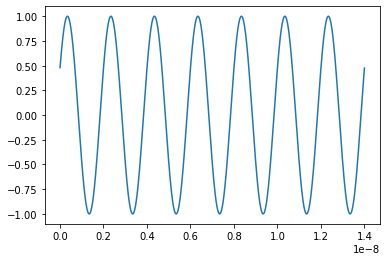

In [121]:
#plotting sine wave that was created

print("Unmodulated Sine Signal")
matplot.plot(time_array,sine_array) 

Total Iterations Ran:  8960
Modulated Signal


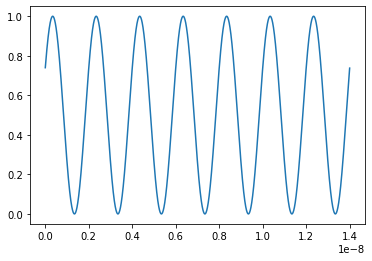

In [123]:
#Modulating the signal using MZ modulator

current_time = 0

current_itr = 0

mod_signal_array = []

while ( current_time < StopTime ):

    signal_temp = sine_array[ current_itr ]
    signal_temp = signal_temp/2
    signal_temp = (signal_temp + 0.5)
    mod_signal_array.append ( signal_temp )
    current_itr = current_itr + 1
    current_time = current_time + d_time

print("Total Iterations Ran: " , current_itr)
print("Modulated Signal")

total_iterations = current_itr

matplot.plot ( time_array, mod_signal_array )

In [124]:
#Inverse Calculation testing

freq_const = 2 * math.pi * Signal_Freq

signal_temp = mod_signal_array[1] - 0.5
signal_temp = signal_temp * 2

signal_temp = math.asin ( signal_temp )
temp_phase  = signal_temp - ( freq_const * d_time )

print( temp_phase )

0.5


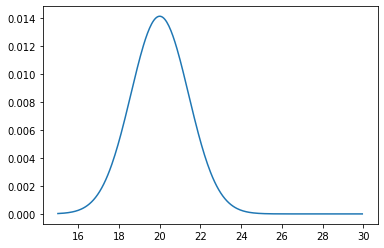

In [125]:
#Testing Gaussian Function

from filterpy.stats import gaussian

xs = np.arange(15, 30, 0.05)
matplot.plot(xs, gaussian(xs, 20, 2))



In [126]:
#Test Load Mat Component


import scipy.io as sio


print("Scipy loaded successfully")

opti_content = sio.loadmat ( 'opti_data_2.mat' )

iter_test = 0

print(opti_content['Opti_Signal'][0,iter_test])

print("Check if data is printing, if yes continue ")

Scipy loaded successfully
0.0014990009990763775
Check if data is printing, if yes continue 


In [25]:
#New Kalman Filter Implementation

predict_array = []
predict_time = []

def predict_f ( predict_phase , current_time ):

    cal_temp = math.sin ( (2* math.pi * current_time * Signal_Freq) + predict_phase)
    cal_temp = cal_temp/2 + 0.5
    predict_array.append(cal_temp)
    predict_time.append ( current_time )

    return ( cal_temp )

def measurement_function ( current_time ):

    temp = math.sin ( 2* math.pi * current_time * Signal_Freq + current_phase )
    current_time = current_time + d_time
     
    return( temp )

def  correction_step ( x_predict , predict_covariance, current_measurement, measurement_covariance ):

    e = x_predict
    E = predict_covariance
    R = measurement_covariance

    z = current_measurement - e 
    Z = E + R

    kalman_gain = E * (1/Z)

    new_x_predict = e + ( kalman_gain * z )

    predict_covariance = predict_covariance - (kalman_gain * predict_covariance )

    return ( new_x_predict, predict_covariance )

def phase_calculation ( updated_mean, delta_time ):

    freq_const = 2 * math.pi * Signal_Freq * delta_time

    signal_temp = updated_mean - 0.5
    signal_temp = signal_temp *2
    signal_temp = math.asin( signal_temp )
    phase = signal_temp - ( freq_const )

    return (phase)


initial_phase = 0
predict_covariance = 0.5
measurement_covariance = 0.5
current_time = 0
return_values = []

total_iterations = 8189

plot_array = []
iter_array = [] 
covariance_array = [] 

measure_array = []

for k in range (total_iterations) : 


    x_predict = predict ( initial_phase, current_time )
    measurement = measurement_function ( current_time )
    return_values = correction_step ( x_predict , predict_covariance , measurement, measurement_covariance)
    measure_array.append(return_values[0])
    initial_phase = phase_calculation ( return_values[0] , current_time)
    current_time = current_time + d_time
    #   print ( return_values[0] , return_values[1] )
    plot_array.append ( initial_phase )
    iter_array.append ( k )
    covariance_array . append ( return_values[1])
    predict_covariance = return_values[1]


#matplot.plot ( predict_time, predict_array )
matplot.plot ( predict_time, measure_array)
print(measure_array[k])





NameError: name 'predict' is not defined

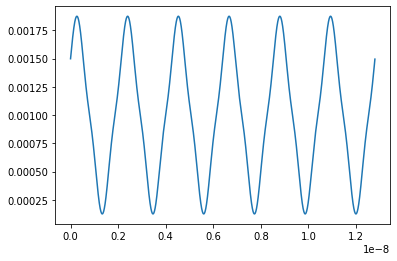

In [89]:
matplot.plot (  opti_content ['Opti_Time'][0], opti_content ['Opti_Signal'][0])

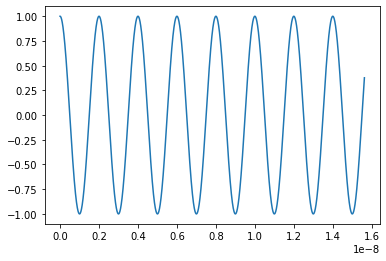

In [29]:
#Implementation of Unscented Kalman Filter

mod_y = [] # Array containing the modulated sine wave

iterations = 10000 #define number of iterations

amplitude = 1

current_time = 0

sine_phase = 1.57

Frequency = 500000000

mod_time = []

for i in range (iterations) :

    temp_calc = amplitude * math.sin (( 2 * math.pi * Frequency * current_time) + sine_phase)

    mod_y.append ( temp_calc )

    mod_time.append ( current_time )

    current_time =  current_time + d_time


matplot.plot ( mod_time , mod_y )



10000


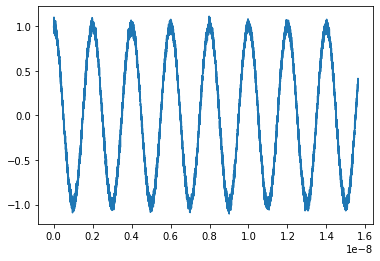

In [84]:
#Adding random noise to the function

from numpy.random import randn

mean = 0

variance = 0.021

print(iterations)

for i in range (iterations):

    mod_y[i] = mod_y[i] + ( variance * randn ()) + mean


matplot.plot ( mod_time , mod_y )

Extended Kalman Filter:
10000
current time: 0 Iterations: 0
actual is : 0.987170715508079
Estimate is:  0.8414709848078965
1.2696633516417757 1.1102230246251565e-16
current time: 1.5625e-12 Iterations: 1
actual is : 0.9895099880417918
Estimate is:  0.9564454910289869
1.3829324603895707 1.1102230246251565e-16
current time: 3.125e-12 Iterations: 2
actual is : 0.9840600480931493
Estimate is:  0.9841915691790241
1.382189853106298 1.1102230246251565e-16
current time: 4.6875e-12 Iterations: 3
actual is : 0.9800763931656367
Estimate is:  0.9849208777008841
1.3541879246141482 1.1102230246251565e-16
current time: 6.25e-12 Iterations: 4
actual is : 0.9805849427101669
Estimate is:  0.9806633712551523
1.3537871700811728 0.0
current time: 7.8125e-12 Iterations: 5
actual is : 0.9856847625266387
Estimate is:  0.9815356262006579
1.3754786643377281 0.0
current time: 9.375e-12 Iterations: 6
actual is : 0.938700414863723
Estimate is:  0.986275869872497
1.0873272513058179 1.1102230246251565e-16
current ti

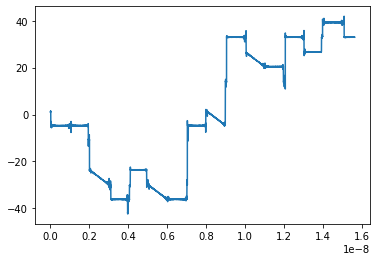

In [72]:
#Extended Kalman Filter Implementation

print("Extended Kalman Filter:")


#mod_y is the measurement with noise -> Use mod_time for sync


def gaussian_addition ( mean1 , mean2, var1, var2):

    temp = []
    temp.append ( mean1 + mean2)
    temp.append ( var1 + var2)

    return temp

def gaussian_mul ( mean1, mean2, var1, var2):

    temp = []
    temp.append ( ((var1*mean2)+(var2*mean1))/(var1+var2) )
    temp.append( (var1*var2)/(var1+var2))

    return temp

def predict ( pre_measure , current_time,  phase_variance,  noise_variance):

   # F = 1 / ( math.sqrt ( 1 - (pre_measure * pre_measure)))

    new_measure = pre_measure
 
    P = noise_variance + phase_variance

    return ( new_measure, P)

def update ( new_measure, actual_measure, P, measurement_variance,  current_time ):

    w =  2 * math.pi * Frequency * current_time
    h_x = math.sin ( w + new_measure )
    y = actual_measure - h_x
    print("actual is :",actual_measure)
    print("Estimate is: ", h_x)

    #H calc

    H = math.cos( w + new_measure )
    H_2 = H*H

    HPH = H_2 * P
    HPHR = HPH + measurement_variance
    K = (P * H ) / HPHR
    x = new_measure + ( K * y )

    P = ( 1 - K*H ) * P
    print(x,P)

    return ( x, P )


#EKF For loop
#def predict ( pre_measure , current_time, phase_variance,  noise_variance): return ( new_measure, P)

#def update ( new_measure, actual_measure, P, measurement_variance,  current_time ):
  #  return ( x, P )
# Declare constants

initial_phase = 1
current_time = 0
phase_var = 0
noise_var = 1
measurement_var = 0

phase_app = []
i=0

print(iterations)

while(i<iterations):

    predict_return =[]
    print("current time:", current_time,"Iterations:", i )

    phase_app.append(initial_phase)

    predict_return = predict(initial_phase, current_time,phase_var, noise_var)

    update_return = []

    update_return = update ( predict_return[0] , mod_y[i], predict_return[1], measurement_var, current_time )

    phase_var = update_return[1]

    initial_phase = update_return[0]

    current_time = current_time + d_time

    i= i + 1


matplot.plot(mod_time, phase_app)

current_time = 0
sine_new = []

i=0

for i in range (iterations):

    w =  2 * math.pi * Frequency * current_time
    h_x = math.sin ( w + phase_app[i] )
    sine_new.append(h_x)
    current_time = current_time + d_time

#matplot.plot(mod_time, sine_new)
#matplot.plot(mod_time, mod_y)




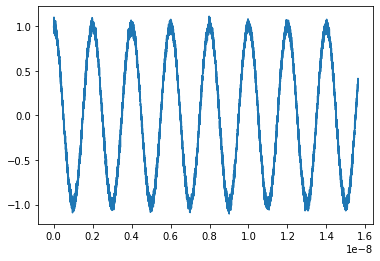

In [85]:
matplot.plot ( mod_time , mod_y )


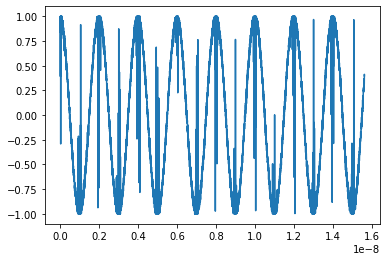

In [86]:
matplot.plot( mod_time, sine_new)